# Hello World

In [1]:
from qiskit import QuantumCircuit

### Step 1: Map the problem to circuits and operators

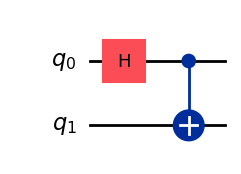

In [2]:
# Circuits
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.draw(output="mpl")

In [3]:
# Measure operators, observables
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')

XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

### Step 2: Optimize

### Step 3: Execute on the backend

In [4]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

### Step 4: Post-process (and plotting)

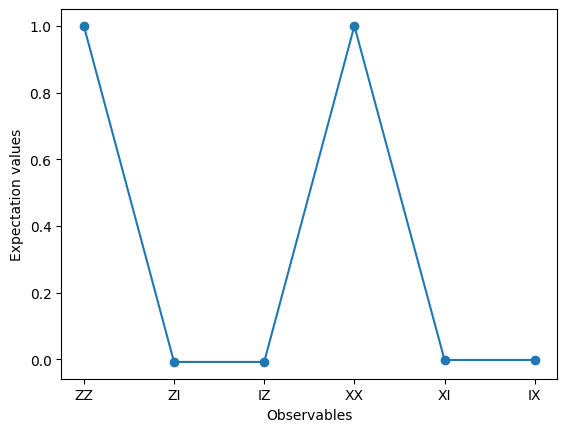

In [5]:
import matplotlib.pyplot as plt

data = ["ZZ", "ZI", "IZ", "XX", "XI", "IX"]
values = job.result().values

plt.plot(data, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Expectation values")
plt.show()

## Extend to $n$-qubit GHZ state

### Step 1: Map the problem to circuits and operators

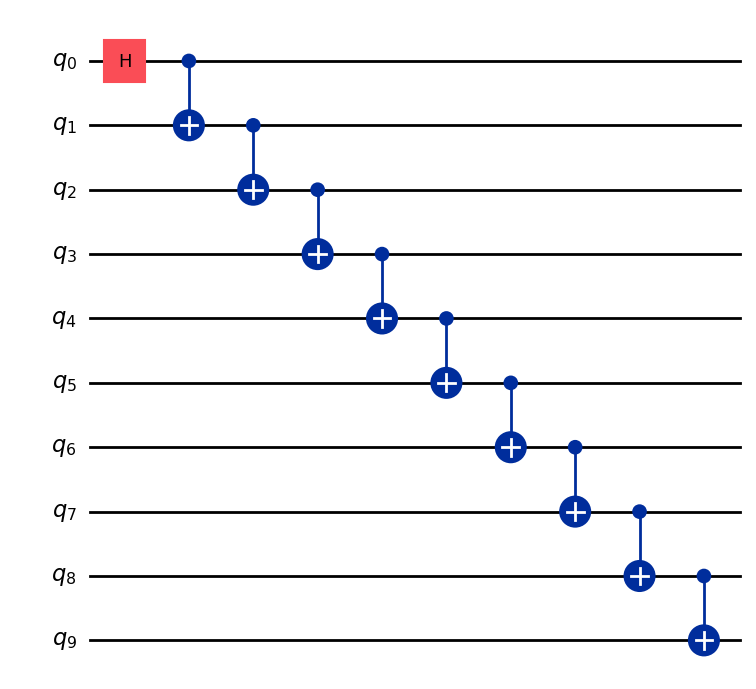

In [6]:
def get_gc_for_n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 10
qc = get_gc_for_n_qubit_GHZ_state(n)
qc.draw(output="mpl")

In [7]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + 'I' * i + 'Z' + 'I' * (n-2-1) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_strings) for operator_strings in operator_strings]

['ZZIIIIIII', 'ZIZIIIIIII', 'ZIIZIIIIIII', 'ZIIIZIIIIIII', 'ZIIIIZIIIIIII', 'ZIIIIIZIIIIIII', 'ZIIIIIIZIIIIIII', 'ZIIIIIIIZIIIIIII', 'ZIIIIIIIIZIIIIIII']
9
